In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [16]:
df_train = pd.read_csv('/home/humoyun/titanic survival/train.csv')
df_test = pd.read_csv('/home/humoyun/titanic survival/test.csv')

In [17]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)


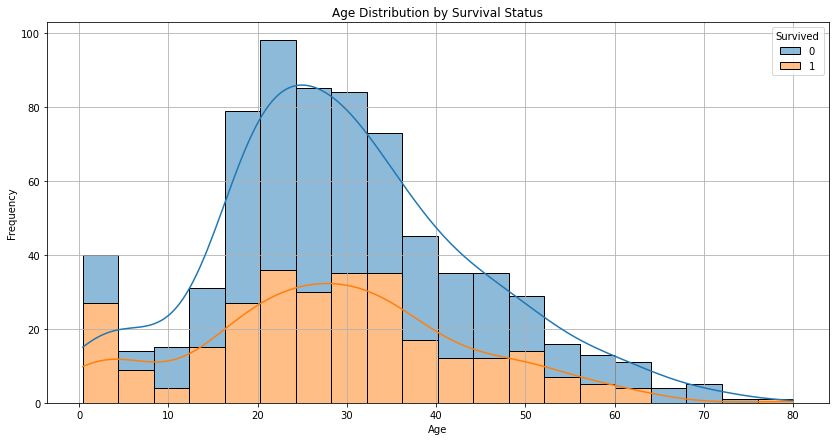

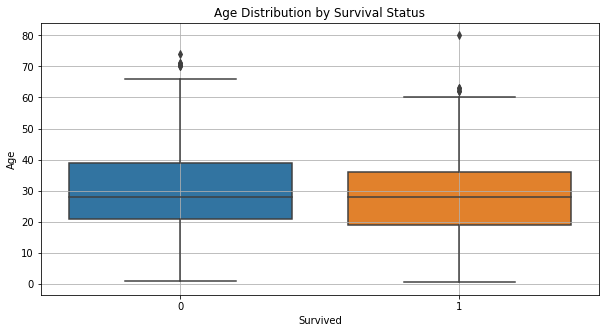

In [19]:
plt.figure(figsize=(14, 7))
sns.histplot(data=df_train, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a boxplot to compare age distributions for survivors and non-survivors
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Age', data=df_train)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.grid(True)
plt.show()


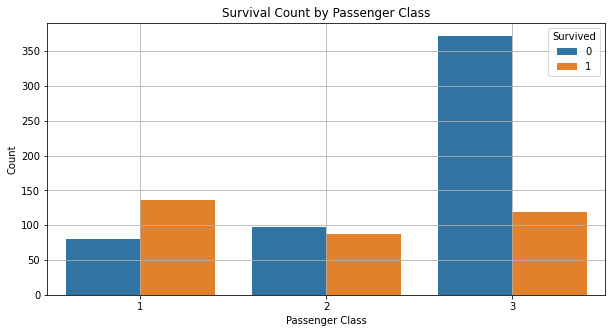

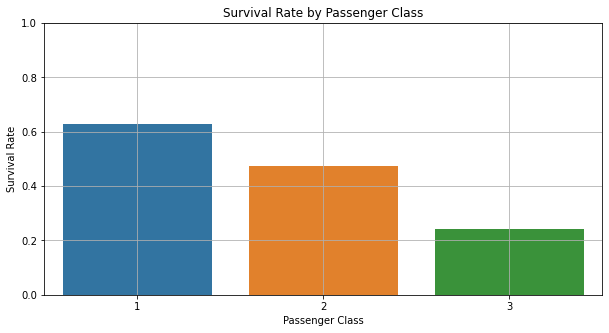

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Pclass', hue='Survived', data=df_train)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Create a bar plot for survival rate by Pclass
plt.figure(figsize=(10, 5))

survival_rate_pclass = df_train.groupby('Pclass')['Survived'].mean()
sns.barplot(x=survival_rate_pclass.index, y=survival_rate_pclass.values)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

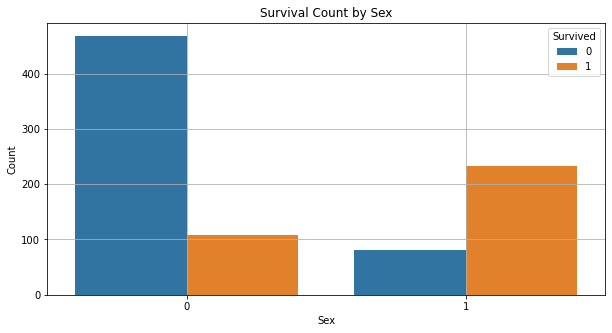

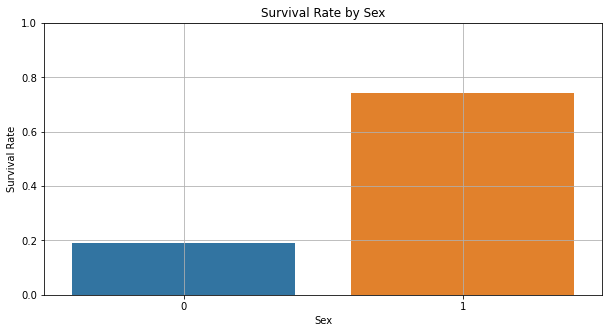

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', hue='Survived', data=df_train)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Create a bar plot for survival rate by Sex
plt.figure(figsize=(10, 5))
survival_rate_sex = df_train.groupby('Sex')['Survived'].mean()
sns.barplot(x=survival_rate_sex.index, y=survival_rate_sex.values)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

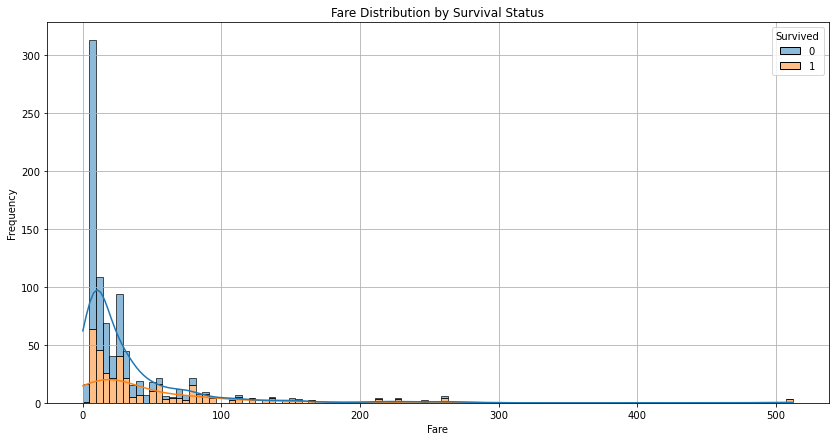

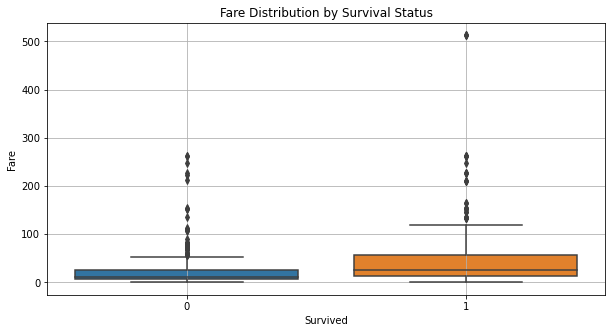

In [33]:


df_train['Fare'].fillna(df_train['Fare'].median(), inplace=True)

# Create histograms for Fare distribution
plt.figure(figsize=(14, 7))
sns.histplot(data=df_train, x='Fare', hue='Survived', multiple='stack', kde=True)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create boxplots for Fare distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='Fare', data=df_train)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

In [20]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

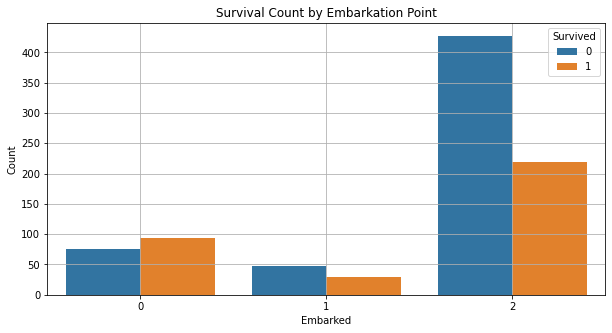

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Embarked', hue='Survived', data=df_train)
plt.title('Survival Count by Embarkation Point')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [21]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64


In [22]:
df_train['Sex'] = df_train['Sex'].apply(lambda x: 0 if x == 'male' else 1)
df_test['Sex'] = df_test['Sex'].apply(lambda x: 0 if x == 'male' else 1)

In [23]:

# Convert 'Embarked' to numerical values
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [24]:
# Create new feature 'FamilySize'
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [25]:
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)

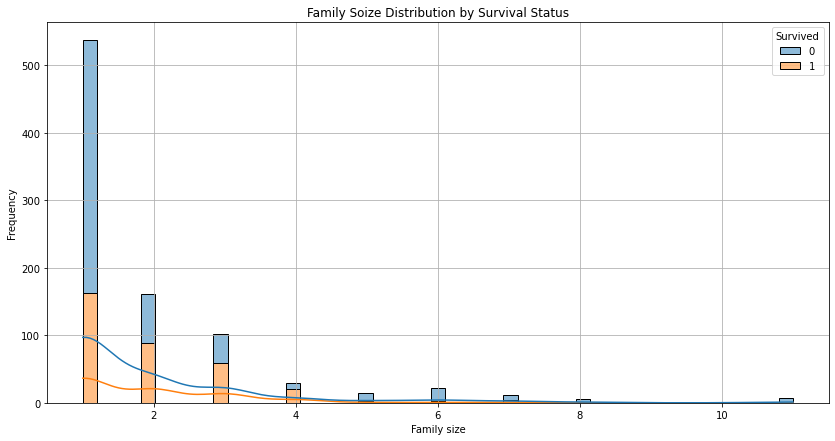

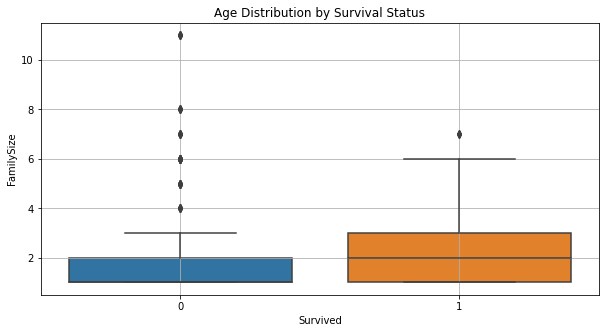

In [26]:
plt.figure(figsize=(14, 7))
sns.histplot(data=df_train, x='FamilySize', hue='Survived', multiple='stack', kde=True)
plt.title('Family Soize Distribution by Survival Status')
plt.xlabel('Family size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a boxplot to compare age distributions for survivors and non-survivors
plt.figure(figsize=(10, 5))
sns.boxplot(x='Survived', y='FamilySize', data=df_train)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('FamilySize')
plt.grid(True)
plt.show()plt.show()


In [27]:
df_train.drop(['Ticket', 'Age', 'Name'], axis= 1, inplace=True)
df_test.drop(['Ticket', 'Age', 'Name'], axis= 1, inplace=True)


In [14]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier

# Assuming your dataframes are named df_train (with 'Survived') and df_test (without 'Survived')

# Define the features and target for the training data
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize']
target = 'Survived'

X_train = df_train[features]
y_train = df_train[target]
X_test = df_test[features]

# Define the numeric features and their transformation pipeline
numeric_features = features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine the numeric transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create the complete machine learning pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

# Fit the model
model_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# If you need the prediction as a dataframe
df_test['Survived'] = y_pred

# Save the prediction to a CSV file if needed
df_test[['PassengerId', 'Survived']].to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
